# Breast cancer data analysis(credit from Buddhini W)

In [4]:
# Loading basic package
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("input/data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'], dtype=object)

### Attribute information

1. ID number 
2. Diagnosis (M = malignant, B = benign) 

3-32. Ten real-valued features are computed for each cell nucleus: 


<ol type = "a">
    <li>radius (mean of distances from center to points on the perimeter)</li>
    <li>texture (standard deviation of gray-scale values) </li>
    <li>preimeter</li>
    <li>area</li>
    <li>smoothness (local variation in radius lengths) </li>
    <li>compactness (perimeter^2 / area - 1.0)</li>
    <li>concavity (severity of concave portions of the contour)</li>
    <li>concave points (number of concave portions of the contour)</li>
    <li>symmetry</li>
    <li>fractal dimension ("coastline approximation" - 1)</li>
</ol>



In [7]:
df.shape

(569, 33)

In [8]:
df.describe()

/Users/amit/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Axis in pandas
This is consistent with the numpy.mean usage when axis is specified explicitly (in numpy.mean , axis==None by default, which computes the mean value over the flattened array) , in which axis=0 along the rows (namely, index in pandas), and axis=1 along the columns.Mar 3, 2014

In [9]:
# Clean and prepare data 
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.shape

(569, 31)

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
#import mpld3 as mpl

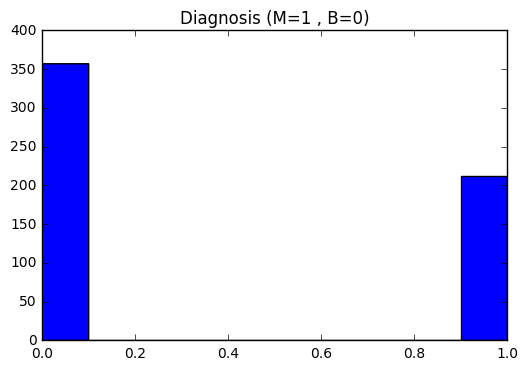

In [47]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [16]:
features_mean=list(df.columns[1:11])

In [17]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

### Nucleus Features vs Diagnosis

In [14]:
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

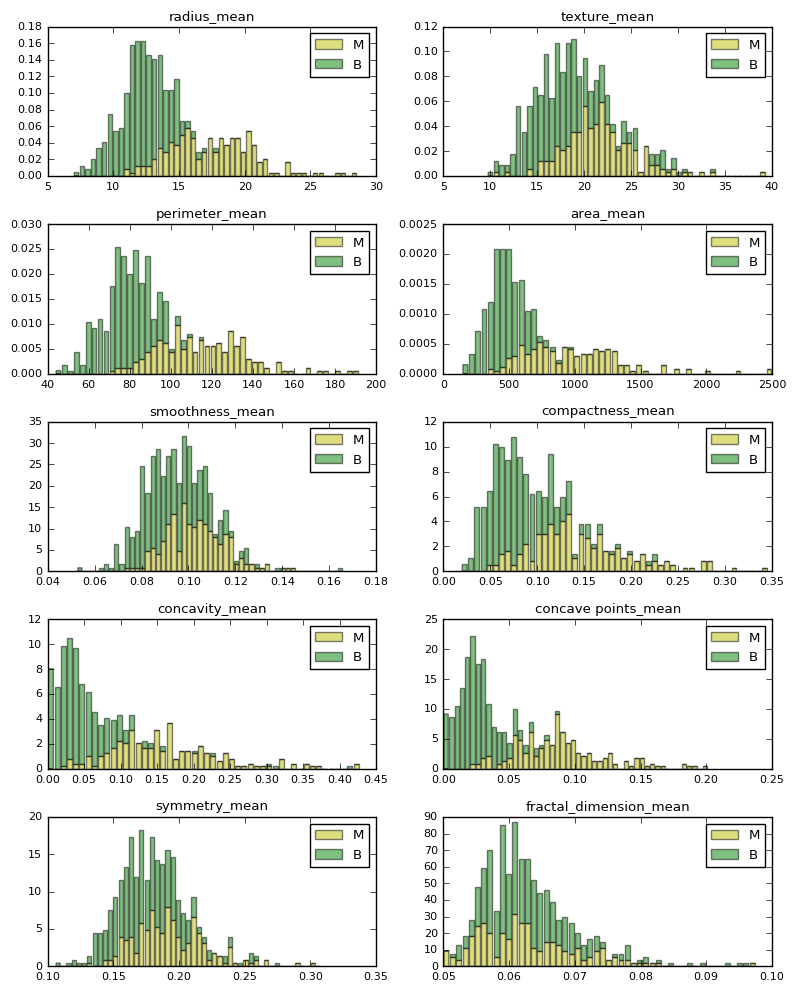

In [20]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    #print(binwidth)
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], 
            bins=np.arange(min(df[features_mean[idx]]), 
                           max(df[features_mean[idx]]) + binwidth, binwidth) , 
            alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['y','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


In [66]:
for a, b in enumerate(axes):
    print(a, b)

0 Axes(0.061875,0.820456;0.410605x0.149489)
1 Axes(0.556599,0.820456;0.410605x0.149489)
2 Axes(0.061875,0.622856;0.410605x0.149489)
3 Axes(0.556599,0.622856;0.410605x0.149489)
4 Axes(0.061875,0.425256;0.410605x0.149489)
5 Axes(0.556599,0.425256;0.410605x0.149489)
6 Axes(0.061875,0.227656;0.410605x0.149489)
7 Axes(0.556599,0.227656;0.410605x0.149489)
8 Axes(0.061875,0.0300556;0.410605x0.149489)
9 Axes(0.556599,0.0300556;0.410605x0.149489)


# Observations
1. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
1. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

### Creating a training and test set 

In [23]:
#Importing models from scikit learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/Users/amit/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [31]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds = 5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

#### Logistic Regression Model

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then perform a logistic regression analysis using those features as follows:

In [35]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.442%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.703%
Cross-Validation Score : 88.937%


<b>Let's check the accuracy with one variable only

In [38]:
predictor_var = ['radius_mean']
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 88.693%
Cross-Validation Score : 86.250%
Cross-Validation Score : 88.750%
Cross-Validation Score : 89.167%
Cross-Validation Score : 87.128%
Cross-Validation Score : 87.677%


In [37]:
<b><i>The accuracy of the predictions are good but not great. The cross-validation scores are reasonable. Can we do better with another model?

<b><i>The accuracy of the predictions are good but not great. The cross-validation scores are reasonable. </i></b>
<font color = 'green'>Can we do better with another model</font>
<h1>Decision Tree Model</h1>

In [40]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.000%
Cross-Validation Score : 88.750%
Cross-Validation Score : 88.333%
Cross-Validation Score : 88.085%
Cross-Validation Score : 87.937%


<font color = 'red'><h3>Here we are over-fitting the model probably due to the large number of predictors.</h3></font> <br>
<font color = 'blue'>Let use a single predictor, the obvious one is the radius of the cell.</font>

In [42]:
predictor_var = ['radius_mean']
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.236%
Cross-Validation Score : 88.750%
Cross-Validation Score : 86.250%
Cross-Validation Score : 85.417%
Cross-Validation Score : 83.050%
Cross-Validation Score : 82.896%


<font color = 'green'>The accuracy of the prediction is much much better here. </font> <font color = 'brown'> But does it depend on the predictor?</font><br>
<font color = 'blue'> Using a single predictor gives a 97% prediction accuracy for this model but the cross-validation score is not that great.</font>

<h1> <u>Random Forest</u></h1>

In [49]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 94.724%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.250%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.210%
Cross-Validation Score : 91.196%


<font color = 'green'>Using all the features improves the prediction accuracy and the cross-validation score is great.</font><br>
<font color = 'blue'>An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. </font> <br><b>So lets select the top 5 features and use them as predictors.

In [50]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.248577
area_mean                 0.172921
radius_mean               0.167151
perimeter_mean            0.134659
concavity_mean            0.115934
compactness_mean          0.076142
texture_mean              0.034225
smoothness_mean           0.022607
symmetry_mean             0.015449
fractal_dimension_mean    0.012335
dtype: float64


In [51]:
predictor_var = ['concave points_mean','perimeter_mean','radius_mean','area_mean','concavity_mean']
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 94.221%
Cross-Validation Score : 95.000%
Cross-Validation Score : 93.125%
Cross-Validation Score : 93.750%
Cross-Validation Score : 92.464%
Cross-Validation Score : 92.199%


<font color = 'blue'>Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.</font><br>
What happens if we use a single predictor as before? Just check.

In [52]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 97.236%
Cross-Validation Score : 88.750%
Cross-Validation Score : 86.250%
Cross-Validation Score : 85.417%
Cross-Validation Score : 83.050%
Cross-Validation Score : 82.896%


<b>This gives a better prediction accuracy too but the cross-validation is not great

<h3><b><i>Using on the test data set</i></b></h3>

In [53]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [54]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 97.076%
Cross-Validation Score : 88.571%
Cross-Validation Score : 92.815%
Cross-Validation Score : 91.289%
Cross-Validation Score : 91.996%
Cross-Validation Score : 93.597%


In [ ]:
The prediction accuracy for the test data set using the above Random Forest model is 95%!